#1: A simple linear regression model is a basic way to understand the relationship between two variables. It explains how one variable (the outcome or dependent variable, often referred to as Y, predicts the other (the predictor or independent variable, often referred to as X) by fitting a straight line to the data points.
Error term: In reality, not all points lie exactly on the line defined by Y = β0 + β1X. Random deviations can occur due to unobservable factors, measurement errors, or inherent randomness.

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Define the model parameters
beta_0 = 2.0  # Intercept
beta_1 = 3.5  # Slope
sigma = 1.0   # Standard deviation of the error term

# Generate predictor variable X
n_samples = 100
X = np.linspace(0, 10, n_samples)

# Generate random error term epsilon ~ N(0, sigma^2)
epsilon = norm.rvs(loc=0, scale=sigma, size=n_samples)

# Calculate outcome variable Y based on the linear model
Y = beta_0 + beta_1 * X + epsilon

# Plot the generated data along with the theoretical line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Generated data points')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True Regression Line (Y = 2 + 3.5X)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression Model Simulation')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1855.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.73e-65
Time:                        21:05:25   Log-Likelihood:                -172.21
No. Observations:                 100   AIC:                             348.4
Df Residuals:                      98   BIC:                             353.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7408      0.272     17.460      0.0

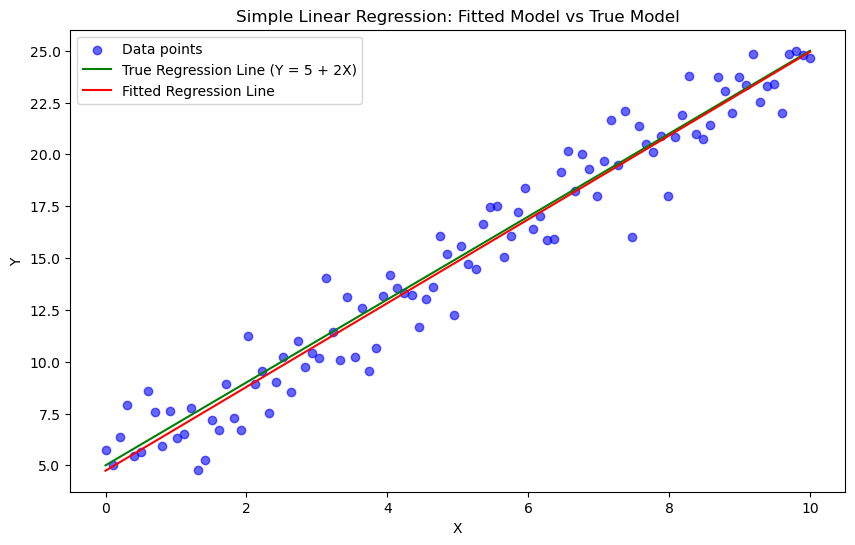

In [2]:
#2: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate the dataset
np.random.seed(42)

# Define model parameters
beta_0 = 5   # Intercept
beta_1 = 2   # Slope
sigma = 1.5  # Standard deviation of the error term

# Generate predictor variable X
n_samples = 100
X = np.linspace(0, 10, n_samples)

# Generate error term epsilon
epsilon = np.random.normal(0, sigma, n_samples)

# Generate outcome variable Y based on the model Y = beta_0 + beta_1 * X + epsilon
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame with the simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model
model = smf.ols('Y ~ X', data=data)  # Define the model using a formula
results = model.fit()                # Fit the model

# Display model summary
print(results.summary())

# Step 3: Visualize the data and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Data points', color='blue', alpha=0.6)
plt.plot(data['X'], beta_0 + beta_1 * data['X'], color='green', label='True Regression Line (Y = 5 + 2X)')
plt.plot(data['X'], results.fittedvalues, color='red', label='Fitted Regression Line')

# Labeling the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression: Fitted Model vs True Model')
plt.legend()
plt.show('png')


#3:
True Regression Line:
This line represents the ‘true’ underlying relationship between X and Y as defined when we simulated the data. It is based on the known parameters β0 and β1 that we initially set (e.g., Y = 5 + 2X) and does not require any estimation or sampling.
In the real world, we don't actually know these real parameters; here, we know them only because we created the data ourselves.

Fitted Regression Line:
This line is the result of fitting a regression model to our simulated sample. It represents the estimated relationship between X and Y based on the data we observed.
Since this line of fit is derived based on our particular sample, it is subject to sampling error. In other words, if we generate a new sample with different random errors, the estimated coefficients (intercepts and slopes) may be slightly different, resulting in a different line of fit.

#4: The fitted values in a linear regression model (via fitted_model.fittedvalues in statsmodels) are the values of Y predicted for each X in the dataset based on the estimated regression equation. These fitted values are derived using the estimated coefficients, which can be found in fitted_model.params.

Key Components:Estimated Coefficients:
fitted_model.params provides the estimated values of the intercept (B0) and slope (B1) based on the sample data.
These estimates are derived by minimising the sum of the squared differences between the observed and predicted values using ordinary least squares (OLS).

Fitted Values:
The fitted values are the predictions made by the model for each X in the dataset. 


#5: In a fitted model using Ordinary Least Squares, the straight line chosen is the one that minimises the sum of the squared differences between the observed and predicted Y values.

The reason why we chose it:
    Mathematical Convenience: Squaring makes all errors positive, so that large positive and negative errors do not cancel each other out, and allows for straightforward calculus-based minimization.



#9:

1. subset data: filter rows in old_faithful with wait times less than or equal to each specified limit (62, 64, and 66 minutes).
2. Fit Model: Run the regression model on each subset for duration ~ wait time.
3. Evaluate P-values: View the P-values of the wait coefficients in the model summary for each subset.

If the p-value remains low (e.g., p<0.05), it provides evidence against the null hypothesis even in the case of short waiting times, suggesting a significant linear relationship.
If the p-value increases (e.g., p>0.1), it indicates that there is no evidence against the null hypothesis of short waiting times, suggesting that the linear relationship may be less strong in this case.


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


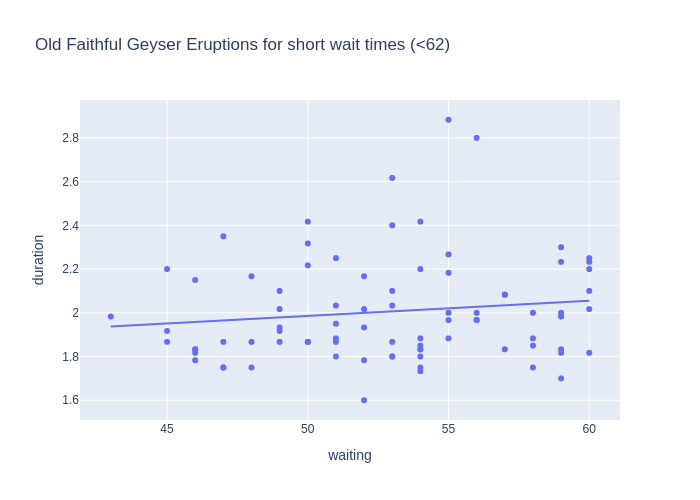

In [1]:
# Import necessary libraries
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset("geyser")

# Set short wait time limit
short_wait_limit = 62 # or 64 or 66

# Filter the data for short wait times
short_wait = old_faithful.waiting < short_wait_limit

# Fit and summarize the linear model
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

# Display the figure
fig.show(renderer="png")  # Use renderer="png" if required for GitHub or MarkUs submissions


#11: 
    
   In the previous model, the data were split into two distinct datasets of short and long waiting times, resulting in different regression models for each subset.
    
 -The new model contains an indicator variable that allows a single regression model to be built using a single parameter (B Contrast) that captures the effect of wait time length (long vs. short). This approach allows direct comparisons to be made in one model rather than two separate analyses.
    
   Evidence against the null would suggest that there is a meaningful difference between short and long wait times in predicting the duration.


#14: yes